In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file_ts_0=h5py.File('/home/zahra/PIPELINE/example_2by3_array/draco_synthesis/maps/tstream_0.h5','r')
file_ts_1=h5py.File('/home/zahra/PIPELINE/example_2by3_array/draco_synthesis/maps/tstream_1.h5','r')
file_ts_2=h5py.File('/home/zahra/PIPELINE/example_2by3_array/draco_synthesis/maps/tstream_2.h5','r')
file_ts_3=h5py.File('/home/zahra/PIPELINE/example_2by3_array/draco_synthesis/maps/tstream_3.h5','r')
file_ag_0=h5py.File('/home/zahra/PIPELINE/example_2by3_array/draco_synthesis/rand_gains/amp_pt001_phase_pt001/app_gain_0.h5','r')
file_ag_1=h5py.File('/home/zahra/PIPELINE/example_2by3_array/draco_synthesis/rand_gains/amp_pt001_phase_pt001/app_gain_1.h5','r')
file_ag_2=h5py.File('/home/zahra/PIPELINE/example_2by3_array/draco_synthesis/rand_gains/amp_pt001_phase_pt001/app_gain_2.h5','r')
file_ag_3=h5py.File('/home/zahra/PIPELINE/example_2by3_array/draco_synthesis/rand_gains/amp_pt001_phase_pt001/app_gain_3.h5','r')
file_rg_2=h5py.File('/home/zahra/PIPELINE/example_2by3_array/draco_synthesis/rand_gains/sig_pt0012.h5','r')

In [3]:
vis_freq_0=file_ts_0['vis'][0,:,:]
vis_freq_1=file_ts_1['vis'][0,:,:]
vis_freq_2=file_ts_2['vis'][0,:,:]
vis_freq_3=file_ts_3['vis'][0,:,:]
vis_freq_ag_0=file_ag_0['vis'][0,:,:]
vis_freq_ag_1=file_ag_1['vis'][0,:,:]
vis_freq_ag_2=file_ag_2['vis'][0,:,:]
vis_freq_ag_3=file_ag_3['vis'][0,:,:]
vis_freq_rg_2=file_rg_2['gain'][0,:,:]

In [9]:
list(file_ts_0.keys())

['history', 'index_map', 'vis', 'vis_weight']

In [10]:
list(file_ts_0['index_map'])

['freq', 'input', 'prod', 'time']

In [11]:
products=file_ts_0['index_map']['prod'].value

In [12]:
file_ts_0['vis']

<HDF5 dataset "vis": shape (2, 78, 1024), type "<c8">

In [13]:
measured_vis=np.array([file_ag_2['vis'][0,2,:],file_ag_2['vis'][0,25,:],file_ag_2['vis'][0,59,:],file_ag_2['vis'][0,69,:],file_ag_2['vis'][0,6,:],file_ag_2['vis'][0,29,:],file_ag_2['vis'][0,48,:],file_ag_2['vis'][0,9,:],file_ag_2['vis'][0,27,:],file_ag_2['vis'][0,31,:],file_ag_2['vis'][0,46,:],file_ag_2['vis'][0,4,:],file_ag_2['vis'][0,61,:],file_ag_2['vis'][0,10,:],file_ag_2['vis'][0,44,:]])

In [14]:
d=np.log(measured_vis)
print (d.real)

[[ 1.930373   1.9330941  1.9359237 ...  2.365359   2.3598654  2.354306 ]
 [-1.7517614 -1.7474248 -1.7441916 ... -3.0154676 -2.9906583 -2.9705434]
 [ 2.0481715  2.0518355  2.0555892 ...  2.3805876  2.3745985  2.3685668]
 ...
 [-2.059049  -2.0483503 -2.0367837 ... -2.121079  -2.1186063 -2.1188855]
 [-3.6867454 -3.6600933 -3.634702  ... -3.4068663 -3.4187458 -3.4319015]
 [-3.7094111 -3.6829166 -3.6576848 ... -3.4223487 -3.4350643 -3.44905  ]]


/home/zahra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [15]:
A=np.array([1,1,0,0,0,0,1,0,0,0,0,
            0,1,1,0,0,0,1,0,0,0,0,
            0,0,0,1,1,0,1,0,0,0,0,
            0,0,0,0,1,1,1,0,0,0,0,
            1,0,0,1,0,0,0,1,0,0,0,
            0,1,0,0,1,0,0,1,0,0,0,
            0,0,1,0,0,1,0,1,0,0,0,
            1,0,0,0,1,0,0,0,1,0,0,
            0,1,0,1,0,0,0,0,1,0,0,
            0,1,0,0,0,1,0,0,1,0,0,
            0,0,1,0,1,0,0,0,1,0,0,
            1,0,0,0,0,0,0,0,0,1,0,
            0,0,0,1,0,1,0,0,0,1,0,
            1,0,0,0,0,1,0,0,0,0,1,
            0,0,1,1,0,0,0,0,0,0,1,
            ])
A=np.reshape(A,(15,11))

In [16]:
A_t=np.transpose(A)
a=np.linalg.inv((np.matmul(A_t,A)))
b=np.matmul(A_t,d.real)
A_t=np.array(A_t,dtype=np.float64)
print (d.real)

print np.sum(np.isnan(d.real))

print (np.sum(A_t[0,1]*np.transpose(d.real)[0,1]))
x=np.matmul(a,b)

SyntaxError: invalid syntax (<ipython-input-16-4960e2262433>, line 7)

/home/zahra/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Visibilities')

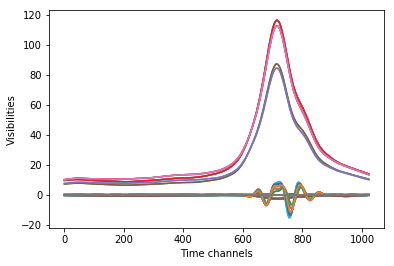

In [17]:
plt.plot(np.transpose(vis_freq_2))
plt.xlabel('Time channels')
plt.ylabel('Visibilities')

Text(0, 0.5, 'Visibilities with gain')

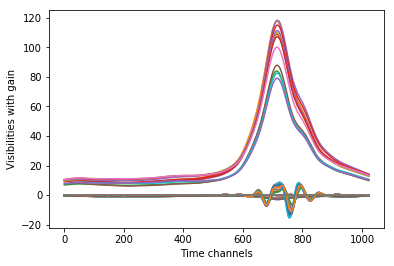

In [18]:
plt.plot(np.transpose(vis_freq_ag_2))
plt.xlabel('Time channels')
plt.ylabel('Visibilities with gain')

In [19]:
vis_freq_rg_2.shape

(12, 1024)

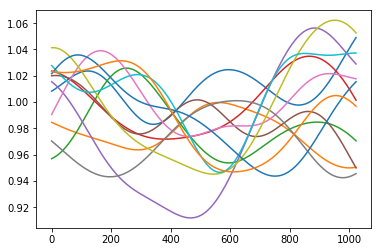

In [20]:
plt.plot(np.transpose(vis_freq_rg_2))


In [55]:
file_ag_1.close()
file_ag_2.close()
file_ag_3.close()
file_ts_0.close()
file_ts_1.close()
file_ts_2.close()
file_ts_3.close()
file_rg_2.close()

In [4]:
from drift.core import manager
m = manager.ProductManager.from_config('prod_params.yaml')

Product directory: /home/zahra/PIPELINE/example_2by3_array/test_prod


In [5]:
from drift.pipeline import timestream
ts = timestream.Timestream('/home/zahra/PIPELINE/example_2by3_array/test_prod/ts_no_noise/', m)

In [6]:
tsf_0=h5py.File(ts._ffile(0))

In [6]:
list(tsf_0.keys())

[u'baselines',
 u'feedconj',
 u'feedmap',
 u'feedmask',
 u'phi',
 u'timestream',
 u'uniquepairs']

In [15]:
tsf_0['timestream']

<HDF5 dataset "timestream": shape (28, 329), type "<c16">

In [40]:
tsf_0['uniquepairs'][17]

array([9, 0])

In [10]:
tsf_0['feedmap'][:]

array([[-1,  0,  4, 16, 20, 24, -1,  1,  5, 17, 21, 25],
       [ 0, -1,  0, 12, 16, 20,  2, -1,  1, 13, 17, 21],
       [ 4,  0, -1,  8, 12, 16,  6,  2, -1,  9, 13, 17],
       [16, 12,  8, -1,  0,  4, 18, 14, 10, -1,  1,  5],
       [20, 16, 12,  0, -1,  0, 22, 18, 14,  2, -1,  1],
       [24, 20, 16,  4,  0, -1, 26, 22, 18,  6,  2, -1],
       [-1,  2,  6, 18, 22, 26, -1,  3,  7, 19, 23, 27],
       [ 1, -1,  2, 14, 18, 22,  3, -1,  3, 15, 19, 23],
       [ 5,  1, -1, 10, 14, 18,  7,  3, -1, 11, 15, 19],
       [17, 13,  9, -1,  2,  6, 19, 15, 11, -1,  3,  7],
       [21, 17, 13,  1, -1,  2, 23, 19, 15,  3, -1,  3],
       [25, 21, 17,  5,  1, -1, 27, 23, 19,  7,  3, -1]])

In [43]:
def prod_ind(f,a,b):
    arr_find=np.where(f==[a, b])[0]
    for i in range(len(arr_find)-1):
        if arr_find[i]==arr_find[i+1]:
            found=arr_find[i]
    return found

def vis_0(inp):
    return tsf_0['timestream'][inp,:].real

In [19]:
pairs=t.uniquepairs

In [47]:
prod_ind(pairs,11,6)

27

In [20]:
pairs.shape

(28, 2)

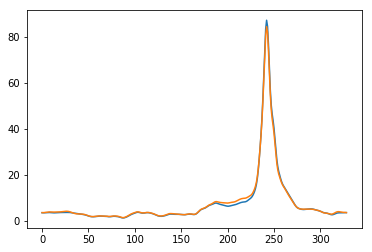

In [66]:
plt.plot(vis_0(prod_ind(pairs,2,0)))
plt.plot(vis_0(prod_ind(pairs,8,6)))
#dishes 1,2 and 4,5

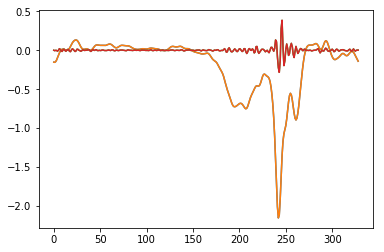

In [72]:
plt.plot(vis_0(prod_ind(pairs,8,0)))
plt.plot(vis_0(prod_ind(pairs,2,6)))
plt.plot(vis_0(prod_ind(pairs,9,1)))
plt.plot(vis_0(prod_ind(pairs,3,7)))
#dishes 1,5 and 2,4

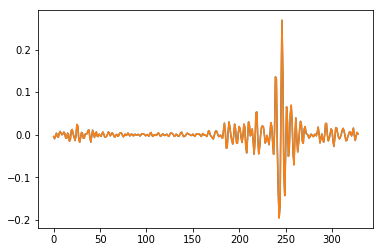

In [74]:
plt.plot(vis_0(prod_ind(pairs,10,0)))
plt.plot(vis_0(prod_ind(pairs,4,6)))
#dishes 1,6 and 3,4

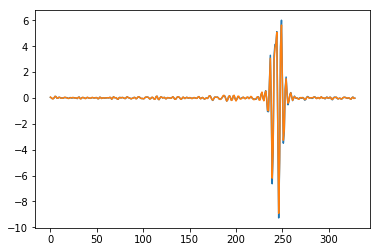

In [77]:
plt.plot(vis_0(prod_ind(pairs,4,0)))
plt.plot(vis_0(prod_ind(pairs,10,6)))
#dishes 1,3 and 4,6

UnboundLocalError: local variable 'found' referenced before assignment

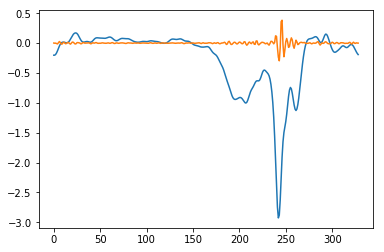

In [104]:
plt.plot(vis_0(prod_ind(pairs,1,6)))
plt.plot(vis_0(prod_ind(pairs,9,2)))
plt.plot(vis_0(prod_ind(pairs,4,11)))

In [7]:
t = m.telescope
print (t)

In [8]:
t.nfeed

12

In [25]:
t.feedpositions

array([[0., 0.],
       [0., 1.],
       [0., 2.],
       [7., 0.],
       [7., 1.],
       [7., 2.],
       [0., 0.],
       [0., 1.],
       [0., 2.],
       [7., 0.],
       [7., 1.],
       [7., 2.]])

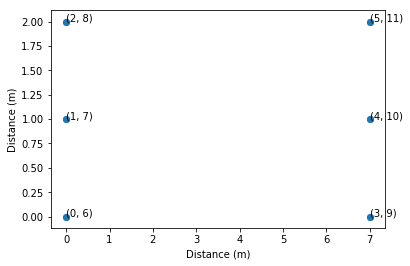

In [53]:
x=np.ndarray.flatten(t.feedpositions)[::2]
y=np.ndarray.flatten(t.feedpositions)[1::2]
#plt.scatter(x,y)
fig, ax = plt.subplots()
ax.scatter(x, y)
plt.ylabel('Distance (m)')
plt.xlabel('Distance (m)')
Nfeeds=12

for i in range(0,Nfeeds/2):
    j=i+Nfeeds/2
    ax.annotate((i,j),(x[i],y[i]))

In [20]:
t.nbase

28

In [21]:
t.npairs

28

In [53]:
print (pairs)

[[ 1  0]
 [ 7  0]
 [ 1  6]
 [ 7  6]
 [ 2  0]
 [ 8  0]
 [ 2  6]
 [ 8  6]
 [ 3  2]
 [ 9  2]
 [ 3  8]
 [ 9  8]
 [ 3  1]
 [ 9  1]
 [ 3  7]
 [ 9  7]
 [ 3  0]
 [ 9  0]
 [ 3  6]
 [ 9  6]
 [ 4  0]
 [10  0]
 [ 4  6]
 [10  6]
 [ 5  0]
 [11  0]
 [ 5  6]
 [11  6]]


In [38]:
t.uniquepairs

array([[ 1,  0],
       [ 7,  0],
       [ 1,  6],
       [ 7,  6],
       [ 2,  0],
       [ 8,  0],
       [ 2,  6],
       [ 8,  6],
       [ 3,  2],
       [ 9,  2],
       [ 3,  8],
       [ 9,  8],
       [ 3,  1],
       [ 9,  1],
       [ 3,  7],
       [ 9,  7],
       [ 3,  0],
       [ 9,  0],
       [ 3,  6],
       [ 9,  6],
       [ 4,  0],
       [10,  0],
       [ 4,  6],
       [10,  6],
       [ 5,  0],
       [11,  0],
       [ 5,  6],
       [11,  6]])

In [59]:
prod_ind(pairs,3,7)

14

In [54]:
tsf_0.close()

In [25]:
np.where(pairs==[17,17])[0]

array([], dtype=int64)